In [3]:
import gym
import torch
import torch.nn as nn
import numpy as np
from lib import wrappers_skips
from lib import dqn_model
import collections
import argparse
import time
import cv2
import gym.spaces
import collections

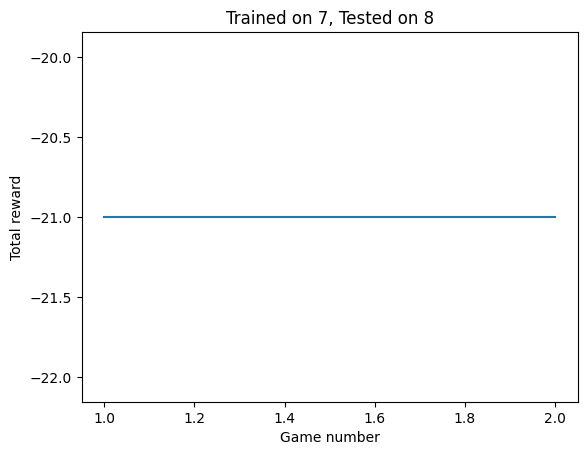

In [20]:
import matplotlib.pyplot as plt

env = wrappers_skips.make_env("PongNoFrameskip-v4", 3)
env.seed(42)
net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
net.load_state_dict(torch.load('C:/NEURO140/Final/PongNoFrameskip-v4-skip3.dat', map_location=lambda storage, loc: storage))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('test.mp4', fourcc, 60.0, (env.render(mode='rgb_array').shape[1], env.render(mode='rgb_array').shape[0]))

n = 2  # number of games to play
total_rewards = []  # list to store the total reward obtained in each game

for i in range(n):
    state = env.reset()
    total_reward = 0.0
    done = False
    obs = env.reset()
    while not done:
        action = net(torch.tensor([obs])).argmax(dim=1).item()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        out.write(env.render(mode='rgb_array'))
    
    total_rewards.append(total_reward)

# Release the VideoWriter object
out.release()
cv2.destroyAllWindows()

# Plot the reward as a function of games played
plt.plot(range(1, n+1), total_rewards)
plt.xlabel('Game number')
plt.ylabel('Total reward')
plt.title("Trained on 7, Tested on 8")
plt.show()


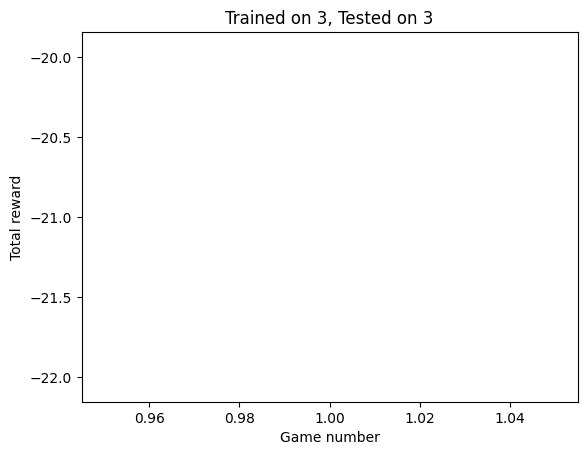

In [35]:
import matplotlib.pyplot as plt

env = wrappers_skips.make_env("PongNoFrameskip-v4", 2)
# env.seed(42)
net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
net.load_state_dict(torch.load('C:/NEURO140/Final/PongNoFrameskip-v4-skip3.dat', map_location=lambda storage, loc: storage))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('tesyt.mp4', fourcc, 60.0, (env.render(mode='rgb_array').shape[1], env.render(mode='rgb_array').shape[0]))

n = 1  # number of games to play
total_rewards = []  # list to store the total reward obtained in each game

for i in range(n):
    state = env.reset()
    total_reward = 0.0
    done = False
    obs = env.reset()
    # env.seed(i)  # seed the environment with game number i
    
    while not done:
        action = net(torch.tensor([obs])).argmax(dim=1).item()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        out.write(env.render(mode='rgb_array'))
    
    total_rewards.append(total_reward)

# Release the VideoWriter object
out.release()
cv2.destroyAllWindows()

# Plot the reward as a function of games played
plt.plot(range(1, n+1), total_rewards)
plt.xlabel('Game number')
plt.ylabel('Total reward')
plt.title("Trained on 3, Tested on 3")
plt.show()
